<a href="https://colab.research.google.com/github/Szczureczek1983/Applied-Data-Science-with-Python-and-Jupyter/blob/master/Projekt_natezenie_ruchu_rowerow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Analiza datych natężenia ruchu rowerowego na mostach na wschodzie Manhatanu z uwzględnieniem temparatury i występowania opadów. 

Import bibliotek



In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [ ]:
df1 = pd.read_csv('/content/nyc-east-river-bicycle-counts.csv')
df1.head()

,Unnamed: 0,Date,Day,High Temp (°F),Low Temp (°F),Precipitation,Brooklyn Bridge,Manhattan Bridge,Williamsburg Bridge,Queensboro Bridge,Total
0,0,2016-04-01 00:00:00,2016-04-01 00:00:00,78.1,66.0,0.01,1704.0,3126,4115.0,2552.0,11497
1,1,2016-04-02 00:00:00,2016-04-02 00:00:00,55.0,48.9,0.15,827.0,1646,2565.0,1884.0,6922
2,2,2016-04-03 00:00:00,2016-04-03 00:00:00,39.9,34.0,0.09,526.0,1232,1695.0,1306.0,4759
3,3,2016-04-04 00:00:00,2016-04-04 00:00:00,44.1,33.1,0.47 (S),521.0,1067,1440.0,1307.0,4335
4,4,2016-04-05 00:00:00,2016-04-05 00:00:00,42.1,26.1,0,1416.0,2617,3081.0,2357.0,9471


In [ ]:
print(df1.shape)

(210, 11)


### Porządkowanie danych

In [ ]:
df1['Date'] = pd.to_datetime(df1['Date'])

df1 = df1.drop('Day', axis=1)
df1 = df1.drop('Unnamed: 0', axis=1)
df1.head()

,Date,High Temp (°F),Low Temp (°F),Precipitation,Brooklyn Bridge,Manhattan Bridge,Williamsburg Bridge,Queensboro Bridge,Total
0,2016-04-01,78.1,66.0,0.01,1704.0,3126,4115.0,2552.0,11497
1,2016-04-02,55.0,48.9,0.15,827.0,1646,2565.0,1884.0,6922
2,2016-04-03,39.9,34.0,0.09,526.0,1232,1695.0,1306.0,4759
3,2016-04-04,44.1,33.1,0.47 (S),521.0,1067,1440.0,1307.0,4335
4,2016-04-05,42.1,26.1,0,1416.0,2617,3081.0,2357.0,9471


In [ ]:
df1['Date'].value_counts()

2016-04-01    7
2016-04-02    7
2016-04-29    7
2016-04-28    7
2016-04-27    7
2016-04-26    7
2016-04-25    7
2016-04-24    7
2016-04-23    7
2016-04-22    7
2016-04-21    7
2016-04-20    7
2016-04-19    7
2016-04-18    7
2016-04-17    7
2016-04-16    7
2016-04-15    7
2016-04-14    7
2016-04-13    7
2016-04-12    7
2016-04-11    7
2016-04-10    7
2016-04-09    7
2016-04-08    7
2016-04-07    7
2016-04-06    7
2016-04-05    7
2016-04-04    7
2016-04-03    7
2016-04-30    7
Name: Date, dtype: int64

In [ ]:
print(df1.isnull().any())

Date                   False
High Temp (°F)         False
Low Temp (°F)          False
Precipitation          False
Brooklyn Bridge        False
Manhattan Bridge       False
Williamsburg Bridge    False
Queensboro Bridge      False
Total                  False
dtype: bool


In [ ]:
print(df1.dtypes)

Date                   datetime64[ns]
High Temp (°F)                float64
Low Temp (°F)                 float64
Precipitation                  object
Brooklyn Bridge               float64
Manhattan Bridge                int64
Williamsburg Bridge           float64
Queensboro Bridge             float64
Total                           int64
dtype: object


Zauważyliśmy, że dane są siedmiokrotnie zduplikowane i dotyczą tylko jednego miesiąca - kwiatnia.

In [ ]:
df = df1.drop_duplicates()

In [ ]:
print(df.shape)

(30, 9)


In [ ]:
df['Precipitation'].value_counts()

0           17
0.01         3
0.09         3
0.15         1
0.47 (S)     1
0.2          1
T            1
0.16         1
0.24         1
0.05         1
Name: Precipitation, dtype: int64

In [ ]:
df[df.Precipitation =='0.47 (S)']

,Date,High Temp (°F),Low Temp (°F),Precipitation,Brooklyn Bridge,Manhattan Bridge,Williamsburg Bridge,Queensboro Bridge,Total
3,2016-04-04,44.1,33.1,0.47 (S),521.0,1067,1440.0,1307.0,4335


In [ ]:
df.loc[3,'Precipitation'] = 0.47

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [ ]:
df.head()

,Date,High Temp (°F),Low Temp (°F),Precipitation,Brooklyn Bridge,Manhattan Bridge,Williamsburg Bridge,Queensboro Bridge,Total
0,2016-04-01,78.1,66.0,0.01,1704.0,3126,4115.0,2552.0,11497
1,2016-04-02,55.0,48.9,0.15,827.0,1646,2565.0,1884.0,6922
2,2016-04-03,39.9,34.0,0.09,526.0,1232,1695.0,1306.0,4759
3,2016-04-04,44.1,33.1,0.47,521.0,1067,1440.0,1307.0,4335
4,2016-04-05,42.1,26.1,0,1416.0,2617,3081.0,2357.0,9471


In [ ]:
df[df.Precipitation =='T']

,Date,High Temp (°F),Low Temp (°F),Precipitation,Brooklyn Bridge,Manhattan Bridge,Williamsburg Bridge,Queensboro Bridge,Total
21,2016-04-22,78.1,63.0,T,2975.0,4907,6093.0,3862.0,17837


In [ ]:
df.loc[21,'Precipitation'] = 0.0

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [ ]:
df['Precipitation'].value_counts()

0       17
0.01     3
0.09     3
0.15     1
0.47     1
0.2      1
0.0      1
0.16     1
0.24     1
0.05     1
Name: Precipitation, dtype: int64

In [ ]:
df.Precipitation = df.Precipitation.astype(float)
df.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,Date,High Temp (°F),Low Temp (°F),Precipitation,Brooklyn Bridge,Manhattan Bridge,Williamsburg Bridge,Queensboro Bridge,Total
0,2016-04-01,78.1,66.0,0.01,1704.0,3126,4115.0,2552.0,11497
1,2016-04-02,55.0,48.9,0.15,827.0,1646,2565.0,1884.0,6922
2,2016-04-03,39.9,34.0,0.09,526.0,1232,1695.0,1306.0,4759
3,2016-04-04,44.1,33.1,0.47,521.0,1067,1440.0,1307.0,4335
4,2016-04-05,42.1,26.1,0.00,1416.0,2617,3081.0,2357.0,9471


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Wstępna wizualizacja

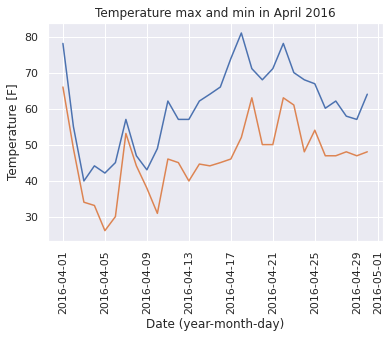

In [ ]:
fig, ax=plt.subplots()

ax.plot(df['Date'], df['High Temp (°F)'])

ax.plot(df['Date'], df['Low Temp (°F)'])
ax.xaxis.set_tick_params(rotation=90)

ax.set_xlabel('Date (year-month-day)')
ax.set_ylabel ('Temperature [F]')
ax.set_title('Temperature max and min in April 2016') 

plt.show()

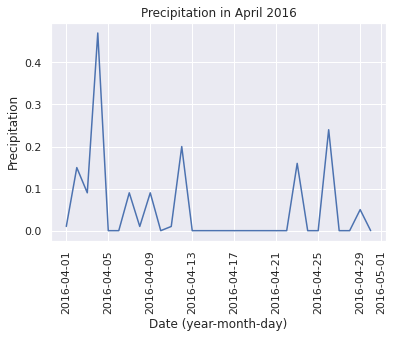

In [ ]:
fig, ax=plt.subplots()

ax.plot(df['Date'], df['Precipitation'])
ax.xaxis.set_tick_params(rotation=90)

ax.set_xlabel('Date (year-month-day)')
ax.set_ylabel ('Precipitation')
ax.set_title('Precipitation in April 2016')  

plt.show()

## Szukanie koleracji

In [ ]:
correlation = df.corr(method='pearson')
columns = correlation.nlargest(10,'High Temp (°F)').index
columns

Index(['High Temp (°F)', 'Low Temp (°F)', 'Williamsburg Bridge', 'Total',
       'Brooklyn Bridge', 'Queensboro Bridge', 'Manhattan Bridge',
       'Precipitation'],
      dtype='object')

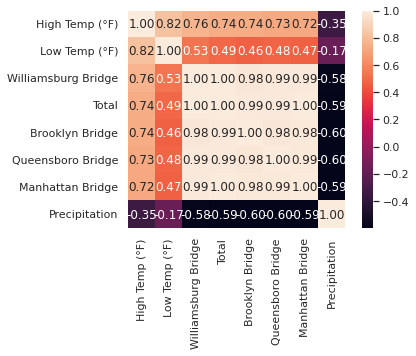

In [ ]:
correlation_map = np.corrcoef(df[columns].values.T)
sns.set(font_scale=1.0)
heatmap = sns.heatmap(correlation_map, cbar=True, annot=True,
                      square=True, fmt='.2f',
                      yticklabels = columns.values, 
                      xticklabels=columns.values)
plt.show()

### Koralacja natężenia ruchu od temperatury

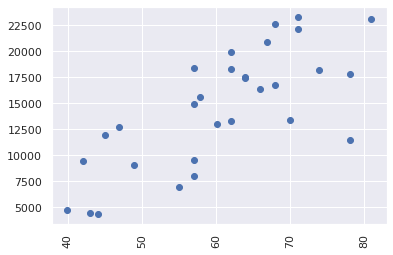

In [ ]:
fig, ax=plt.subplots()

ax.scatter(df['High Temp (°F)'], df['Total'])
ax.xaxis.set_tick_params(rotation=90)

plt.show()

In [ ]:
X = df['High Temp (°F)'].values
Y = df['Total'].values

In [ ]:
X = X.reshape(-1,1)

In [ ]:
X_plot = df['High Temp (°F)'].values

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor


In [ ]:
kfold = KFold(n_splits=10, random_state=21, shuffle=True)
scaler = StandardScaler()
scaler.fit(X_train)
X_train_sc = scaler.transform(X_train)
cv_results = cross_val_score(LinearRegression(),
                             X_train_sc, Y_train,
                             cv=kfold,
                             scoring='neg_mean_squared_error')
print('LinearRegressor cv score: ', cv_results.mean(), cv_results.std())

LinearRegressor cv score:  -21673081.713027034 14715600.854804503


In [ ]:
np.sqrt(21673081.713027034)

4655.435716775288

In [ ]:
cv_results = cross_val_score(DecisionTreeRegressor(),
                             X_train_sc, Y_train,
                             cv=kfold,
                             scoring='neg_mean_squared_error')
print('DecisionTreeRegressor cv score: ', cv_results.mean(), cv_results.std())

DecisionTreeRegressor cv score:  -28047910.85787037 14896693.788091056


Model Regresji liniowej ma mniejszy błąd.

## Regresja liniowa

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [ ]:
model1 = LinearRegression()
model1.fit(X_train,Y_train)

LinearRegression()

In [ ]:
model1.intercept_

-5965.0182897620125

In [ ]:
model1.coef_

array([339.88946644])

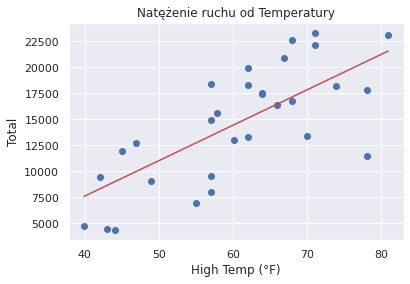

In [ ]:
theta_0 = model1.intercept_
theta_1 = model1.coef_[0]

x = np.linspace(min(X_plot), max(X_plot), 100)
pred1 = theta_0 + theta_1*x

plt.scatter(X_plot, Y)
plt.plot(x, pred1, 'r')
plt.xlabel('High Temp (°F)')
plt.ylabel('Total')
plt.title('Natężenie ruchu od Temperatury')
plt.show()

## WIELOMIAN 2 STOPNIA

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
poly1 = PolynomialFeatures(degree=2)
X_poly1 = poly1.fit_transform(X_train)

In [ ]:
model2 = LinearRegression()
model2.fit(X_poly1, Y_train)

LinearRegression()

In [ ]:
model2.coef_

array([   0.        , 1552.11478228,  -10.28432411])

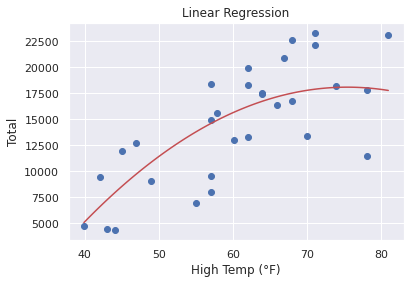

In [ ]:
t_0 = model2.intercept_
t_1 = model2.coef_[1]
t_2 = model2.coef_[2]


x = np.linspace(min(X_plot), max(X_plot), 100)
x = x.reshape(-1,1)
X_poly1 = poly1.transform(x)

plt.scatter(X_plot, Y)
pred2 = model2.predict(X_poly1)
plt.plot(x, pred2, 'r')
plt.xlabel('High Temp (°F)')
plt.ylabel('Total')
plt.title('Linear Regression')
plt.show()

## Wielomian 3 stopnia

In [ ]:
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X_train)

In [ ]:
model = LinearRegression()
model.fit(X_poly, Y_train)

LinearRegression()

In [ ]:
model.coef_

array([ 0.00000000e+00, -1.31513192e+04,  2.42096342e+02, -1.40961684e+00])

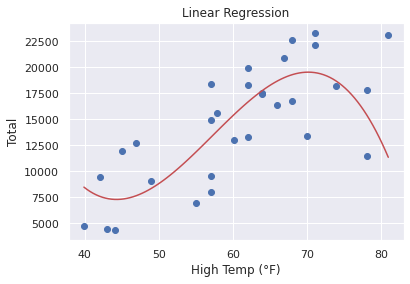

In [ ]:
t_0 = model.intercept_
t_1 = model.coef_[1]
t_2 = model.coef_[2]
t_3 = model.coef_[3]


x = np.linspace(min(X_plot), max(X_plot), 100)
x = x.reshape(-1,1)
X_poly = poly.transform(x)

plt.scatter(X_plot, Y)
pred3 = model.predict(X_poly)
plt.plot(x, pred3, 'r')
plt.xlabel('High Temp (°F)')
plt.ylabel('Total')
plt.title('Linear Regression')
plt.show()

## Sprawdzenie na zbiorze testowym

In [ ]:
from sklearn.metrics import mean_squared_error

### Model 1 Regresja Liniowa

In [ ]:
#X_test_poly = poly.transform(X_test)

In [ ]:
predictions1 = model1.predict(X_test)
print(mean_squared_error(Y_test, predictions1))

4275144.25822246


In [ ]:
np.sqrt(4275144.25822246)

2067.6421978239996

## Model Wielomian 2-stopnia

In [ ]:
X_test_poly2 = poly1.transform(X_test)

In [ ]:
predictions = model2.predict(X_test_poly2)
print(mean_squared_error(Y_test, predictions))

6741336.292255321


In [ ]:
np.sqrt(6741336.292255321)

2596.408344666786

### Model Wielomian 3-stopnia

In [ ]:
X_test_poly = poly.transform(X_test)

In [ ]:
predictions = model.predict(X_test_poly)
print(mean_squared_error(Y_test, predictions))

26909649.819186118


In [ ]:
np.sqrt(26909649.819186118)

5187.451187161776

Najmniejszy błąd ma REGRESJA LINIOWA